# Problem 1: Basics of Neural Networks
* <b>Learning Objective:</b> In this problem, you are asked to implement a basic multi-layer fully connected neural network from scratch, including forward and backward passes of certain essential layers, to perform an image classification task on CIFAR-10 dataset. You need to implement essential functions in different indicated python files under directory `lib`.
* <b>Provided Code:</b> We provide the skeletons of classes you need to complete. Forward checking and gradient checkings are provided for verifying your implementation as well.
* <b>TODOs:</b> You are asked to implement the forward passes and backward passes for standard layers and loss functions, various widely-used optimizers, and part of the training procedure. And finally we want you to train a network from scratch on your own.

In [1]:
from lib.fully_conn import *
from lib.layer_utils import *
from lib.grad_check import *
from lib.datasets import *
from lib.optim import *
from lib.train import *
import numpy as np
import matplotlib.pyplot as plt
import time

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Loading the data (CIFAR-10)
Run the following code block to download CIFAR-10 dataset and load in the properly splitted CIFAR-10 data.

In [4]:
!./get_datasets.sh

--2019-02-21 20:40:10--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘data/cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M   135KB/s    in 10m 43s 

2019-02-21 20:50:54 (259 KB/s) - ‘data/cifar-10-python.tar.gz’ saved [170498071/170498071]

x cifar-10-batches-py/
x cifar-10-batches-py/data_batch_4
x cifar-10-batches-py/readme.html
x cifar-10-batches-py/test_batch
x cifar-10-batches-py/data_batch_3
x cifar-10-batches-py/batches.meta
x cifar-10-batches-py/data_batch_2
x cifar-10-batches-py/data_batch_5
x cifar-10-batches-py/data_batch_1


In [5]:
data = CIFAR10_data()
for k, v in data.items():
    print ("Name: {} Shape: {}".format(k, v.shape))

Name: data_train Shape: (49000, 3, 32, 32)
Name: labels_train Shape: (49000,)
Name: data_val Shape: (1000, 3, 32, 32)
Name: labels_val Shape: (1000,)
Name: data_test Shape: (1000, 3, 32, 32)
Name: labels_test Shape: (1000,)


## Implement Standard Layers
You will now implement all the following standard layers commonly seen in a fully connected neural network. Please refer to the file `lib/layer_utils.py`. Take a look at each class skeleton, and we will walk you through the network layer by layer. We provide results of some examples we pre-computed for you for checking the forward pass, and also the gradient checking for the backward pass.

## FC Forward
In the class skeleton `flatten` and `fc` in `lib/layer_utils.py`, please complete the forward pass in function `forward`, the input to the fc layer may not be of dimension (batch size, features size), it could be an image or any higher dimensional data. Make sure that you handle this dimensionality issue. 

In [6]:
%reload_ext autoreload

# Test the fc forward function
input_bz = 3
input_dim = (7, 6, 4)
output_dim = 4

input_size = input_bz * np.prod(input_dim)
weight_size = output_dim * np.prod(input_dim)

flatten_layer = flatten(name="flatten_test")
single_fc = fc(np.prod(input_dim), output_dim, init_scale=0.02, name="fc_test")

x = np.linspace(-0.1, 0.4, num=input_size).reshape(input_bz, *input_dim)
w = np.linspace(-0.2, 0.2, num=weight_size).reshape(np.prod(input_dim), output_dim)
b = np.linspace(-0.3, 0.3, num=output_dim)

single_fc.params[single_fc.w_name] = w
single_fc.params[single_fc.b_name] = b

out = single_fc.forward(flatten_layer.forward(x))

correct_out = np.array([[0.63910291, 0.83740057, 1.03569824, 1.23399591],
                        [0.61401587, 0.82903823, 1.04406058, 1.25908294],
                        [0.58892884, 0.82067589, 1.05242293, 1.28416997]])

# Compare your output with the above pre-computed ones. 
# The difference should not be larger than 1e-8
print ("Difference: ", rel_error(out, correct_out))

Difference:  4.02601593296122e-09


## FC Backward
Please complete the function `backward` as the backward pass of the fc layer. Follow the instructions in the comments to store gradients into the predefined dictionaries in the attributes of the class. Parameters of the layer are also stored in the predefined dictionary.

In [7]:
%reload_ext autoreload

# Test the fc backward function
x = np.random.randn(15, 2, 2, 3)
w = np.random.randn(12, 15)
b = np.random.randn(15)
dout = np.random.randn(15, 15)

flatten_layer = flatten(name="flatten_test")
x = flatten_layer.forward(x)
single_fc = fc(np.prod(x.shape[1:]), 15, init_scale=5e-2, name="fc_test")
single_fc.params[single_fc.w_name] = w
single_fc.params[single_fc.b_name] = b

dx_num = eval_numerical_gradient_array(lambda x: single_fc.forward(x), x, dout)
dw_num = eval_numerical_gradient_array(lambda w: single_fc.forward(x), w, dout)
db_num = eval_numerical_gradient_array(lambda b: single_fc.forward(x), b, dout)

out = single_fc.forward(x)
dx = single_fc.backward(dout)
dw = single_fc.grads[single_fc.w_name]
db = single_fc.grads[single_fc.b_name]

# The error should be around 1e-9
print ("dx Error: ", rel_error(dx_num, dx))
# The errors should be around 1e-10
print ("dw Error: ", rel_error(dw_num, dw))
print ("db Error: ", rel_error(db_num, db))

dx Error:  9.244097361609026e-10
dw Error:  3.1789162848521815e-09
db Error:  4.804107322107059e-11


## ReLU Forward
In the class skeleton `relu` in `lib/layer_utils.py`, please complete the `forward` pass.

In [8]:
%reload_ext autoreload

# Test the relu forward function
x = np.linspace(-1.5, 1.5, num=12).reshape(3, 4)
relu_f = relu(name="relu_f")

out = relu_f.forward(x)

correct_out = np.array([[0.,          0.,         0.,         0.        ],
                        [0.,          0.,         0.13636364, 0.40909091],
                        [0.68181818,  0.95454545, 1.22727273, 1.5      ]])

# Compare your output with the above pre-computed ones. 
# The difference should not be larger than 1e-7
print ("Difference: ", rel_error(out, correct_out))

Difference:  1.3333333629634122e-08


## ReLU Backward
Please complete the `backward` pass of the class `relu`.

In [9]:
%reload_ext autoreload

# Test the relu backward function
x = np.random.randn(15, 15)
dout = np.random.randn(*x.shape)
relu_b = relu(name="relu_b")

dx_num = eval_numerical_gradient_array(lambda x: relu_b.forward(x), x, dout)

out = relu_b.forward(x)
dx = relu_b.backward(dout)

# The error should not be larger than 1e-10
print ("dx Error: ", rel_error(dx_num, dx))

dx Error:  3.275610605888507e-12


## Dropout Forward
In the class `dropout` in `lib/layer_utils.py`, please complete the `forward` pass.  
Remember that the dropout is only applied during training phase, you should pay attention to this while implementing the function.
##### Important Note1: The probability argument input to the function is the "keep probability": probability that each element is kept
##### Important Note2: If the keep_prob is set to 0, make it as no drop out

In [10]:
%reload_ext autoreload

x = np.random.randn(100, 100) + 5.0

print ("----------------------------------------------------------------")
for p in [0, 0.25, 0.50, 0.75, 1]:
    dropout_f = dropout(keep_prob=p)
    out = dropout_f.forward(x, True)
    out_test = dropout_f.forward(x, False)

    print ("Dropout Keep Prob = ", p)
    print ("Mean of input: ", x.mean())
    print ("Mean of output during training time: ", out.mean())
    print ("Mean of output during testing time: ", out_test.mean())
    print ("Fraction of output set to zero during training time: ", (out == 0).mean())
    print ("Fraction of output set to zero during testing time: ", (out_test == 0).mean())
    print ("----------------------------------------------------------------")

----------------------------------------------------------------
Dropout Keep Prob =  0
Mean of input:  4.99814522878997
Mean of output during training time:  4.99814522878997
Mean of output during testing time:  4.99814522878997
Fraction of output set to zero during training time:  0.0
Fraction of output set to zero during testing time:  0.0
----------------------------------------------------------------
Dropout Keep Prob =  0.25
Mean of input:  4.99814522878997
Mean of output during training time:  1.2358226727111876
Mean of output during testing time:  1.2495363071974925
Fraction of output set to zero during training time:  0.7545
Fraction of output set to zero during testing time:  0.0
----------------------------------------------------------------
Dropout Keep Prob =  0.5
Mean of input:  4.99814522878997
Mean of output during training time:  2.5193311608984437
Mean of output during testing time:  2.499072614394985
Fraction of output set to zero during training time:  0.4958
Frac

## Dropout Backward
Please complete the `backward` pass. Again remember that the dropout is only applied during training phase, handle this in the backward pass as well.

In [11]:
%reload_ext autoreload

x = np.random.randn(5, 5) + 5
dout = np.random.randn(*x.shape)

keep_prob = 0.75
dropout_b = dropout(keep_prob, seed=100)
out = dropout_b.forward(x, True)
dx = dropout_b.backward(dout)
dx_num = eval_numerical_gradient_array(lambda xx: dropout_b.forward(xx, True), x, dout)

# The error should not be larger than 1e-9
print ('dx relative error: ', rel_error(dx, dx_num))

dx relative error:  1.892895811471007e-11


## Testing cascaded layers: FC + ReLU
Please find the `TestFCReLU` function in `lib/fully_conn.py`. <br />
You only need to complete few lines of code in the TODO block. <br />
Please design an `FC --> ReLU` two-layer-mini-network where the parameters of them match the given x, w, and b <br />
Please insert the corresponding names you defined for each layer to param_name_w, and param_name_b respectively. <br />
Here you only modify the param_name part, the `_w`, and `_b` are automatically assigned during network setup 

In [12]:
%reload_ext autoreload

x = np.random.randn(3, 4, 5)  # the input features
w = np.random.randn(20, 10)   # the weight of fc layer
b = np.random.randn(10)       # the bias of fc layer
dout = np.random.randn(3, 10) # the gradients to the output, notice the shape

tiny_net = TestFCReLU()

# param_name should be replaced accordingly
param_name = "fc1"
tiny_net.net.assign(param_name + "_w", w)
tiny_net.net.assign(param_name + "_b", b)

out = tiny_net.forward(x)
dx = tiny_net.backward(dout)

# param_name should be replaced accordingly
dw = tiny_net.net.get_grads(param_name + "_w")
db = tiny_net.net.get_grads(param_name + "_b")

dx_num = eval_numerical_gradient_array(lambda x: tiny_net.forward(x), x, dout)
dw_num = eval_numerical_gradient_array(lambda w: tiny_net.forward(x), w, dout)
db_num = eval_numerical_gradient_array(lambda b: tiny_net.forward(x), b, dout)

# The errors should not be larger than 1e-7
print ("dx error: ", rel_error(dx_num, dx))
print ("dw error: ", rel_error(dw_num, dw))
print ("db error: ", rel_error(db_num, db))

dx error:  5.597226343541658e-10
dw error:  3.285305783889331e-10
db error:  2.5551839143195873e-11


## SoftMax Function and Loss Layer
In the `lib/layer_utils.py`, please first complete the function `softmax`, which will be used in the function `cross_entropy`. Then, implement `corss_entropy` using `softmax`.
Please refer to the lecture slides of the mathematical expressions of the cross entropy loss function, and complete its forward pass and backward pass.

In [13]:
%reload_ext autoreload

num_classes, num_inputs = 6, 100
x = 0.001 * np.random.randn(num_inputs, num_classes)
y = np.random.randint(num_classes, size=num_inputs)

test_loss = cross_entropy()

dx_num = eval_numerical_gradient(lambda x: test_loss.forward(x, y), x, verbose=False)

loss = test_loss.forward(x, y)
dx = test_loss.backward()

# Test softmax_loss function. Loss should be around 1.792
# and dx error should be at the scale of 1e-8 (or smaller)
print ("Cross Entropy Loss: ", loss)
print ("dx error: ", rel_error(dx_num, dx))

Cross Entropy Loss:  1.7917317732407947
dx error:  7.0960832780684405e-09


## Test a Small Fully Connected Network
Please find the `SmallFullyConnectedNetwork` function in `lib/fully_conn.py`. <br />
Again you only need to complete few lines of code in the TODO block. <br />
Please design an `FC --> ReLU --> FC --> ReLU` network where the shapes of parameters match the given shapes <br />
Please insert the corresponding names you defined for each layer to param_name_w, and param_name_b respectively. <br />
Here you only modify the param_name part, the `_w`, and `_b` are automatically assigned during network setup 

In [14]:
%reload_ext autoreload

seed = 1234
np.random.seed(seed=seed)

model = SmallFullyConnectedNetwork()
loss_func = cross_entropy()

N, D, = 4, 4  # N: batch size, D: input dimension
H, C  = 30, 7 # H: hidden dimension, C: output dimension
std = 0.02
x = np.random.randn(N, D)
y = np.random.randint(C, size=N)

print ("Testing initialization ... ")

# param_name should be replaced accordingly
fc1 = "fc1"
fc2 = "fc2"

w1_std = abs(model.net.get_params(fc1 + "_w").std() - std)
b1 = model.net.get_params(fc1 + "_b").std()
w2_std = abs(model.net.get_params(fc2 + "_w").std() - std)
b2 = model.net.get_params(fc2 + "_b").std()

assert w1_std < std / 10, "First layer weights do not seem right"
assert np.all(b1 == 0), "First layer biases do not seem right"
assert w2_std < std / 10, "Second layer weights do not seem right"
assert np.all(b2 == 0), "Second layer biases do not seem right"
print ("Passed!")

print ("Testing test-time forward pass ... ")
w1 = np.linspace(-0.7, 0.3, num=D*H).reshape(D, H)
w2 = np.linspace(-0.3, 0.4, num=H*C).reshape(H, C)
b1 = np.linspace(-0.1, 0.9, num=H)
b2 = np.linspace(-0.9, 0.1, num=C)

# param_name should be replaced accordingly
model.net.assign(fc1 + "_w", w1)
model.net.assign(fc1 + "_b", b1)
model.net.assign(fc2 + "_w", w2)
model.net.assign(fc2 + "_b", b2)

feats = np.linspace(-5.5, 4.5, num=N*D).reshape(D, N).T
scores = model.forward(feats)
correct_scores = np.asarray([[4.20670862, 4.87188359, 5.53705856, 6.20223352, 6.86740849, 7.53258346, 8.19775843],
                             [4.74826036, 5.35984681, 5.97143326, 6.58301972, 7.19460617, 7.80619262, 8.41777907],
                             [5.2898121,  5.84781003, 6.40580797, 6.96380591, 7.52180384, 8.07980178, 8.63779971],
                             [5.83136384, 6.33577326, 6.84018268, 7.3445921,  7.84900151, 8.35341093, 8.85782035]])
scores_diff = np.sum(np.abs(scores - correct_scores))
assert scores_diff < 1e-6, "Your implementation might went wrong!"
print ("Passed!")

print ("Testing the loss ...",)
y = np.asarray([0, 5, 1, 4])
loss = loss_func.forward(scores, y)
dLoss = loss_func.backward()
print (str.format("Loss from my code = {}", loss))
correct_loss = 2.90181552716
assert abs(loss - correct_loss) < 1e-10, "Your implementation might went wrong!"
print ("Passed!")

print ("Testing the gradients (error should be no larger than 1e-6) ...")
din = model.backward(dLoss)
for layer in model.net.layers:
    if not layer.params:
        continue
    for name in sorted(layer.grads):
        f = lambda _: loss_func.forward(model.forward(feats), y)
        grad_num = eval_numerical_gradient(f, layer.params[name], verbose=False)
        print ('%s relative error: %.2e' % (name, rel_error(grad_num, layer.grads[name])))

Testing initialization ... 
Passed!
Testing test-time forward pass ... 
Passed!
Testing the loss ...
Loss from my code = 2.901815527158027
Passed!
Testing the gradients (error should be no larger than 1e-6) ...
fc1_b relative error: 2.85e-09
fc1_w relative error: 7.76e-09
fc2_b relative error: 4.33e-07
fc2_w relative error: 3.03e-09


## Test a Fully Connected Network regularized with Dropout
Please find the `DropoutNet` function in `fully_conn.py` under lib directory. <br />
For this part you don't need to design a new network, just simply run the following test code <br />
If something goes wrong, you might want to double check your dropout implementation

In [15]:
%reload_ext autoreload

seed = 1234
np.random.seed(seed=seed)

N, D, C = 3, 15, 10
X = np.random.randn(N, D)
y = np.random.randint(C, size=(N,))

for keep_prob in [0, 0.25, 0.5]:
    print ("Dropout p =", keep_prob)
    model = DropoutNet(keep_prob=keep_prob, seed=seed)
    loss_func = cross_entropy()
    output = model.forward(X, True)
    loss = loss_func.forward(output, y)
    dLoss = loss_func.backward()
    dX = model.backward(dLoss)
    grads = model.net.grads

    print ("Error of gradients should be around or less than 1e-5")
    for name in sorted(grads):
        if name not in model.net.params.keys():
            continue
        f = lambda _: loss_func.forward(model.forward(X, True), y)
        grad_num = eval_numerical_gradient(f, model.net.params[name], verbose=False, h=1e-5)
        print ("{} relative error: {}".format(name, rel_error(grad_num, grads[name])))
    print ()

Dropout p = 0
Error of gradients should be around or less than 1e-5
fc1_b relative error: 5.84056468549173e-08
fc1_w relative error: 2.3619787034400103e-06
fc2_b relative error: 4.557166849374739e-08
fc2_w relative error: 7.639166173127875e-06
fc3_b relative error: 2.1827243320409778e-10
fc3_w relative error: 1.1814112799895045e-06

Dropout p = 0.25
Error of gradients should be around or less than 1e-5
fc1_b relative error: 1.3644583281452308e-06
fc1_w relative error: 1.6276662875250605e-05
fc2_b relative error: 7.330826452483702e-08
fc2_w relative error: 3.6125485377059722e-06
fc3_b relative error: 1.8805791343506273e-11
fc3_w relative error: 7.291474534467892e-08

Dropout p = 0.5
Error of gradients should be around or less than 1e-5
fc1_b relative error: 6.231954574189567e-08
fc1_w relative error: 1.5085633313466196e-05
fc2_b relative error: 5.062890114176113e-08
fc2_w relative error: 6.592781441233491e-06
fc3_b relative error: 5.4508430928357e-10
fc3_w relative error: 1.906738796399

## Training a Network
In this section, we defined a `TinyNet` class for you to fill in the TODO block in `lib/fully_conn.py`.
* Here please design a two layer fully connected network for this part.
* Please read the `lib/train.py` carefully and complete the TODO blocks in the `train_net` function first. Codes in "Test a Small Fully Connected Network" can be helpful.
* In addition, read how the SGD function is implemented in `lib/optim.py`, you will be asked to complete three other optimization methods in the later sections.

In [16]:
# Arrange the data
data_dict = {
    "data_train": (data["data_train"], data["labels_train"]),
    "data_val": (data["data_val"], data["labels_val"]),
    "data_test": (data["data_test"], data["labels_test"])
}

In [17]:
print(data["data_train"].shape)
print(data["labels_train"].shape)

(49000, 3, 32, 32)
(49000,)


### Now train the network to achieve at least 50% validation accuracy

In [38]:
%reload_ext autoreload

seed = 123
np.random.seed(seed=seed)

model = TinyNet(h_layer1 = 256)
starter_lr = 1e-4
# The below line is just for convenience of progressing training without resetting the model
# parameters. I usually comment this when I am trying a network architecture for the first time.
# After that, I usually try for some number of epochs to see if I get 50% accuracy, when that
# was not enough, I continue by uncommenting this line so that network parameters are not reset.
# That way I can try more epochs. The starting learning rate below is also to continue learning
# from the decayed learning rate instead of resetting it.
# model.net.load(opt_params)
# starter_lr = 2.035064078701249e-05
loss_f = cross_entropy()
optimizer = SGD(model.net, starter_lr)

results = None
#############################################################################
# TODO: Use the train_net function you completed to train a network         #
#############################################################################
start = time.time()
results = train_net(data_dict, model, loss_f, optimizer, batch_size=100, max_epochs = 300, verbose=True, lr_decay=0.96, lr_decay_every=2, show_every=50)
end = time.time()
print (str.format("Time taken = {}", end - start))
#############################################################################
#                             END OF YOUR CODE                              #
#############################################################################
opt_params, loss_hist, train_acc_hist, val_acc_hist = results
print (val_acc_hist)

(Iteration 1 / 147000) loss: 17.85764346339677
(Iteration 51 / 147000) loss: 9.896166104190169
(Iteration 101 / 147000) loss: 7.271256657870002
(Iteration 151 / 147000) loss: 8.11840639712837
(Iteration 201 / 147000) loss: 6.606950349107238
(Iteration 251 / 147000) loss: 5.548459196686723
(Iteration 301 / 147000) loss: 5.708796098157823
(Iteration 351 / 147000) loss: 5.677208923440171
(Iteration 401 / 147000) loss: 4.504468814368843
(Iteration 451 / 147000) loss: 4.222318396885092
(Epoch 1 / 300) Training Accuracy: 0.3179183673469388, Validation Accuracy: 0.306
(Iteration 501 / 147000) loss: 3.7973072447656553
(Iteration 551 / 147000) loss: 3.3294542649925227
(Iteration 601 / 147000) loss: 3.5014693890045407
(Iteration 651 / 147000) loss: 3.2754549981590806
(Iteration 701 / 147000) loss: 3.1390020050472844
(Iteration 751 / 147000) loss: 3.276384268201475
(Iteration 801 / 147000) loss: 2.4576915916089175
(Iteration 851 / 147000) loss: 3.1570920071409647
(Iteration 901 / 147000) loss: 1.

(Iteration 6701 / 147000) loss: 1.5885449014503974
(Iteration 6751 / 147000) loss: 1.4317861686398794
(Iteration 6801 / 147000) loss: 1.6891971636433778
(Iteration 6851 / 147000) loss: 1.4462438867859886
(Epoch 14 / 300) Training Accuracy: 0.4486734693877551, Validation Accuracy: 0.456
Decaying learning rate of the optimizer to 7.514474781081598e-05
(Iteration 6901 / 147000) loss: 1.5620514727678014
(Iteration 6951 / 147000) loss: 1.6194711373404571
(Iteration 7001 / 147000) loss: 1.7225622520707822
(Iteration 7051 / 147000) loss: 1.4130712150762281
(Iteration 7101 / 147000) loss: 1.597393677786598
(Iteration 7151 / 147000) loss: 1.419218510124158
(Iteration 7201 / 147000) loss: 1.6461438051399313
(Iteration 7251 / 147000) loss: 1.4493222206416476
(Iteration 7301 / 147000) loss: 1.5550478168131072
(Epoch 15 / 300) Training Accuracy: 0.45312244897959186, Validation Accuracy: 0.443
(Iteration 7351 / 147000) loss: 1.316656267692702
(Iteration 7401 / 147000) loss: 1.4884523589073808
(Itera

(Iteration 13201 / 147000) loss: 1.6533971009637827
(Epoch 27 / 300) Training Accuracy: 0.4799795918367347, Validation Accuracy: 0.454
(Iteration 13251 / 147000) loss: 1.3396992373214738
(Iteration 13301 / 147000) loss: 1.448315270187635
(Iteration 13351 / 147000) loss: 1.4218925692534996
(Iteration 13401 / 147000) loss: 1.2922213136182845
(Iteration 13451 / 147000) loss: 1.5739216216321432
(Iteration 13501 / 147000) loss: 1.6344272775237678
(Iteration 13551 / 147000) loss: 1.6417144798217291
(Iteration 13601 / 147000) loss: 1.6007397901729876
(Iteration 13651 / 147000) loss: 1.5694138378120703
(Iteration 13701 / 147000) loss: 1.7173263612579066
(Epoch 28 / 300) Training Accuracy: 0.47785714285714287, Validation Accuracy: 0.455
Decaying learning rate of the optimizer to 5.6467331235511337e-05
(Iteration 13751 / 147000) loss: 1.4644253082662129
(Iteration 13801 / 147000) loss: 1.1911891643554606
(Iteration 13851 / 147000) loss: 1.41348009689025
(Iteration 13901 / 147000) loss: 1.6253695

(Iteration 19651 / 147000) loss: 1.4979424536458756
(Iteration 19701 / 147000) loss: 1.3514954610597738
(Iteration 19751 / 147000) loss: 1.525484805513496
(Iteration 19801 / 147000) loss: 1.2412909442866944
(Iteration 19851 / 147000) loss: 1.4209072176155733
(Iteration 19901 / 147000) loss: 1.3337710571122323
(Iteration 19951 / 147000) loss: 1.4538195253669528
(Iteration 20001 / 147000) loss: 1.4691785269155695
(Iteration 20051 / 147000) loss: 1.3169584024285101
(Epoch 41 / 300) Training Accuracy: 0.49448979591836734, Validation Accuracy: 0.468
(Iteration 20101 / 147000) loss: 1.535177754035709
(Iteration 20151 / 147000) loss: 1.4238549329289747
(Iteration 20201 / 147000) loss: 1.4716434943239773
(Iteration 20251 / 147000) loss: 1.2810083209445862
(Iteration 20301 / 147000) loss: 1.325735461145307
(Iteration 20351 / 147000) loss: 1.3764338810727157
(Iteration 20401 / 147000) loss: 1.6195477524951496
(Iteration 20451 / 147000) loss: 1.3298853152810017
(Iteration 20501 / 147000) loss: 1.

(Iteration 26151 / 147000) loss: 1.4821987122885554
(Iteration 26201 / 147000) loss: 1.2849718706067486
(Iteration 26251 / 147000) loss: 1.3904067636465138
(Iteration 26301 / 147000) loss: 1.3774852828263318
(Iteration 26351 / 147000) loss: 1.3311215331920454
(Iteration 26401 / 147000) loss: 1.3331059612557765
(Iteration 26451 / 147000) loss: 1.3578227604794164
(Epoch 54 / 300) Training Accuracy: 0.5083469387755102, Validation Accuracy: 0.467
Decaying learning rate of the optimizer to 3.321416142563493e-05
(Iteration 26501 / 147000) loss: 1.348914767026771
(Iteration 26551 / 147000) loss: 1.4939035034170456
(Iteration 26601 / 147000) loss: 1.4360098034803572
(Iteration 26651 / 147000) loss: 1.4395038241097529
(Iteration 26701 / 147000) loss: 1.3170745429142778
(Iteration 26751 / 147000) loss: 1.4102175091369449
(Iteration 26801 / 147000) loss: 1.2887672109469628
(Iteration 26851 / 147000) loss: 1.587775425213132
(Iteration 26901 / 147000) loss: 1.5139987691619756
(Epoch 55 / 300) Train

(Iteration 32601 / 147000) loss: 1.419206781265164
(Iteration 32651 / 147000) loss: 1.3051012876033072
(Iteration 32701 / 147000) loss: 1.4080162627339348
(Iteration 32751 / 147000) loss: 1.4293852383974233
(Iteration 32801 / 147000) loss: 1.2910165557623126
(Epoch 67 / 300) Training Accuracy: 0.5163265306122449, Validation Accuracy: 0.489
(Iteration 32851 / 147000) loss: 1.4893071337422648
(Iteration 32901 / 147000) loss: 1.2551856776190107
(Iteration 32951 / 147000) loss: 1.3172695096926952
(Iteration 33001 / 147000) loss: 1.2947675042649285
(Iteration 33051 / 147000) loss: 1.1948947799591156
(Iteration 33101 / 147000) loss: 1.3411745608468173
(Iteration 33151 / 147000) loss: 1.11445742959238
(Iteration 33201 / 147000) loss: 1.3432003589088861
(Iteration 33251 / 147000) loss: 1.472952511195904
(Iteration 33301 / 147000) loss: 1.2998966812648733
(Epoch 68 / 300) Training Accuracy: 0.5151632653061224, Validation Accuracy: 0.493
Decaying learning rate of the optimizer to 2.4958697840770

(Iteration 39101 / 147000) loss: 1.4450493461519909
(Iteration 39151 / 147000) loss: 1.317443347486281
(Epoch 80 / 300) Training Accuracy: 0.5215714285714286, Validation Accuracy: 0.479
Decaying learning rate of the optimizer to 1.953661515553199e-05
(Iteration 39201 / 147000) loss: 1.448455217026035
(Iteration 39251 / 147000) loss: 1.3236021284471735
(Iteration 39301 / 147000) loss: 1.3295412146292584
(Iteration 39351 / 147000) loss: 1.31239985892291
(Iteration 39401 / 147000) loss: 1.4030830252885662
(Iteration 39451 / 147000) loss: 1.3342941217711035
(Iteration 39501 / 147000) loss: 1.3661124096854538
(Iteration 39551 / 147000) loss: 1.4411248669133352
(Iteration 39601 / 147000) loss: 1.3242247127023565
(Iteration 39651 / 147000) loss: 1.2547320936630282
(Epoch 81 / 300) Training Accuracy: 0.523061224489796, Validation Accuracy: 0.485
(Iteration 39701 / 147000) loss: 1.3477660179066462
(Iteration 39751 / 147000) loss: 1.5530024089135857
(Iteration 39801 / 147000) loss: 1.40384622594

(Iteration 45551 / 147000) loss: 0.9940032076474716
(Epoch 93 / 300) Training Accuracy: 0.5260204081632653, Validation Accuracy: 0.491
(Iteration 45601 / 147000) loss: 1.3681291082204072
(Iteration 45651 / 147000) loss: 1.3580610345826734
(Iteration 45701 / 147000) loss: 1.1037744696903282
(Iteration 45751 / 147000) loss: 1.403327180593103
(Iteration 45801 / 147000) loss: 1.3203125646648124
(Iteration 45851 / 147000) loss: 1.1626215637622614
(Iteration 45901 / 147000) loss: 1.3627077449053917
(Iteration 45951 / 147000) loss: 1.1343607416400467
(Iteration 46001 / 147000) loss: 1.3367809959718384
(Iteration 46051 / 147000) loss: 1.417869089708734
(Epoch 94 / 300) Training Accuracy: 0.5251836734693878, Validation Accuracy: 0.483
Decaying learning rate of the optimizer to 1.468074018939417e-05
(Iteration 46101 / 147000) loss: 1.2516077853288947
(Iteration 46151 / 147000) loss: 1.4182818370266863
(Iteration 46201 / 147000) loss: 1.3095435762706922
(Iteration 46251 / 147000) loss: 1.18741607

(Iteration 51951 / 147000) loss: 1.364862726047225
(Iteration 52001 / 147000) loss: 1.2176836376576539
(Iteration 52051 / 147000) loss: 1.4591995116186292
(Iteration 52101 / 147000) loss: 1.2481475046815589
(Iteration 52151 / 147000) loss: 1.3547234268669808
(Iteration 52201 / 147000) loss: 1.4897667314560386
(Iteration 52251 / 147000) loss: 1.330708795240448
(Iteration 52301 / 147000) loss: 1.3578883737302294
(Iteration 52351 / 147000) loss: 1.5111592297797216
(Iteration 52401 / 147000) loss: 1.3998838335808663
(Epoch 107 / 300) Training Accuracy: 0.5295714285714286, Validation Accuracy: 0.488
(Iteration 52451 / 147000) loss: 1.2717880656346296
(Iteration 52501 / 147000) loss: 1.3644690663387522
(Iteration 52551 / 147000) loss: 1.3968877509536584
(Iteration 52601 / 147000) loss: 1.301371717670579
(Iteration 52651 / 147000) loss: 1.469150560624702
(Iteration 52701 / 147000) loss: 1.1130168014479611
(Iteration 52751 / 147000) loss: 1.5190704783094033
(Iteration 52801 / 147000) loss: 1.3

(Iteration 58451 / 147000) loss: 1.652361793765053
(Iteration 58501 / 147000) loss: 1.2971053654135556
(Iteration 58551 / 147000) loss: 1.2651990519550773
(Iteration 58601 / 147000) loss: 1.5166839659645228
(Iteration 58651 / 147000) loss: 1.5499804087687477
(Iteration 58701 / 147000) loss: 1.3132332161747433
(Iteration 58751 / 147000) loss: 1.3748423036684272
(Epoch 120 / 300) Training Accuracy: 0.5298775510204081, Validation Accuracy: 0.486
Decaying learning rate of the optimizer to 8.635231448510457e-06
(Iteration 58801 / 147000) loss: 1.3879921953341656
(Iteration 58851 / 147000) loss: 1.330759133761248
(Iteration 58901 / 147000) loss: 1.2943589759061862
(Iteration 58951 / 147000) loss: 1.1850720512470938
(Iteration 59001 / 147000) loss: 1.4139226505657745
(Iteration 59051 / 147000) loss: 1.4138618833200525
(Iteration 59101 / 147000) loss: 1.559900799288809
(Iteration 59151 / 147000) loss: 1.4143693534908288
(Iteration 59201 / 147000) loss: 1.2249863455475063
(Iteration 59251 / 147

(Iteration 64901 / 147000) loss: 1.3508105945477544
(Iteration 64951 / 147000) loss: 1.276738419101118
(Iteration 65001 / 147000) loss: 1.29111380658462
(Iteration 65051 / 147000) loss: 1.327712152522973
(Iteration 65101 / 147000) loss: 1.1386471296894352
(Iteration 65151 / 147000) loss: 1.3154308012072078
(Epoch 133 / 300) Training Accuracy: 0.5338163265306123, Validation Accuracy: 0.488
(Iteration 65201 / 147000) loss: 1.3528547374536453
(Iteration 65251 / 147000) loss: 1.2849334892206814
(Iteration 65301 / 147000) loss: 1.7018898788176282
(Iteration 65351 / 147000) loss: 1.2996704617706767
(Iteration 65401 / 147000) loss: 1.3425543524967807
(Iteration 65451 / 147000) loss: 1.4977614500311178
(Iteration 65501 / 147000) loss: 1.5220959239963168
(Iteration 65551 / 147000) loss: 1.3221096610486194
(Iteration 65601 / 147000) loss: 1.3065204584575432
(Iteration 65651 / 147000) loss: 1.3009756585043726
(Epoch 134 / 300) Training Accuracy: 0.5323877551020408, Validation Accuracy: 0.493
Deca

(Iteration 71401 / 147000) loss: 1.1963731745377666
(Iteration 71451 / 147000) loss: 1.3096250755808831
(Iteration 71501 / 147000) loss: 1.4219391957317515
(Epoch 146 / 300) Training Accuracy: 0.5350816326530612, Validation Accuracy: 0.485
Decaying learning rate of the optimizer to 5.079254942691085e-06
(Iteration 71551 / 147000) loss: 1.4060572750720695
(Iteration 71601 / 147000) loss: 1.337535479760112
(Iteration 71651 / 147000) loss: 1.2556387785087602
(Iteration 71701 / 147000) loss: 1.3533630837239294
(Iteration 71751 / 147000) loss: 1.2540841333589006
(Iteration 71801 / 147000) loss: 1.2953214806862379
(Iteration 71851 / 147000) loss: 1.3495889341824157
(Iteration 71901 / 147000) loss: 1.380906126425686
(Iteration 71951 / 147000) loss: 1.4299317856223177
(Iteration 72001 / 147000) loss: 1.287473768323217
(Epoch 147 / 300) Training Accuracy: 0.5344897959183673, Validation Accuracy: 0.485
(Iteration 72051 / 147000) loss: 1.3331965707926559
(Iteration 72101 / 147000) loss: 1.4221662

(Iteration 77851 / 147000) loss: 1.5581251331956834
(Iteration 77901 / 147000) loss: 1.3447039851464446
(Epoch 159 / 300) Training Accuracy: 0.5347142857142857, Validation Accuracy: 0.487
(Iteration 77951 / 147000) loss: 1.3776599455682834
(Iteration 78001 / 147000) loss: 1.2620810678793708
(Iteration 78051 / 147000) loss: 1.2541827541350579
(Iteration 78101 / 147000) loss: 1.2349670572504146
(Iteration 78151 / 147000) loss: 1.3234503456733009
(Iteration 78201 / 147000) loss: 1.2707236159365882
(Iteration 78251 / 147000) loss: 1.1371400145380717
(Iteration 78301 / 147000) loss: 1.192818891262757
(Iteration 78351 / 147000) loss: 1.4007823792073082
(Epoch 160 / 300) Training Accuracy: 0.5341428571428571, Validation Accuracy: 0.489
Decaying learning rate of the optimizer to 3.816793317353622e-06
(Iteration 78401 / 147000) loss: 1.3486693782279304
(Iteration 78451 / 147000) loss: 1.3161736080286084
(Iteration 78501 / 147000) loss: 1.3506237933142886
(Iteration 78551 / 147000) loss: 1.18273

(Iteration 84301 / 147000) loss: 1.394848381960431
(Iteration 84351 / 147000) loss: 1.3280692313800702
(Iteration 84401 / 147000) loss: 1.4907890711740794
(Iteration 84451 / 147000) loss: 1.2912255942062427
(Iteration 84501 / 147000) loss: 1.1853222289899497
(Iteration 84551 / 147000) loss: 1.422466639787144
(Iteration 84601 / 147000) loss: 1.3108240819366324
(Iteration 84651 / 147000) loss: 1.2953115097408214
(Iteration 84701 / 147000) loss: 1.292850220229407
(Iteration 84751 / 147000) loss: 1.5106001635105024
(Epoch 173 / 300) Training Accuracy: 0.5354489795918367, Validation Accuracy: 0.489
(Iteration 84801 / 147000) loss: 1.2889219039197557
(Iteration 84851 / 147000) loss: 1.278713924302699
(Iteration 84901 / 147000) loss: 1.3956948486553806
(Iteration 84951 / 147000) loss: 1.3953397907970837
(Iteration 85001 / 147000) loss: 1.177211063711539
(Iteration 85051 / 147000) loss: 1.1662120925947506
(Iteration 85101 / 147000) loss: 1.4577667883369336
(Iteration 85151 / 147000) loss: 1.31

(Iteration 90801 / 147000) loss: 1.3721367754976006
(Iteration 90851 / 147000) loss: 1.4638660152244813
(Iteration 90901 / 147000) loss: 1.4029406393398944
(Iteration 90951 / 147000) loss: 1.4462836535680317
(Iteration 91001 / 147000) loss: 1.4749691123689792
(Iteration 91051 / 147000) loss: 1.3868722730641958
(Iteration 91101 / 147000) loss: 1.2208004820296872
(Epoch 186 / 300) Training Accuracy: 0.5359387755102041, Validation Accuracy: 0.484
Decaying learning rate of the optimizer to 2.2450430469634697e-06
(Iteration 91151 / 147000) loss: 1.3200580981468986
(Iteration 91201 / 147000) loss: 1.3794133828704396
(Iteration 91251 / 147000) loss: 1.140365573821004
(Iteration 91301 / 147000) loss: 1.5279104944675521
(Iteration 91351 / 147000) loss: 1.4980821561450604
(Iteration 91401 / 147000) loss: 1.47913209329371
(Iteration 91451 / 147000) loss: 1.3311009365148054
(Iteration 91501 / 147000) loss: 1.2582543488057372
(Iteration 91551 / 147000) loss: 1.396409805976262
(Iteration 91601 / 147

(Iteration 97251 / 147000) loss: 1.4218589752710722
(Iteration 97301 / 147000) loss: 1.1661100198863403
(Iteration 97351 / 147000) loss: 1.2718005172584577
(Iteration 97401 / 147000) loss: 0.9929077609897168
(Iteration 97451 / 147000) loss: 1.4774269623954197
(Iteration 97501 / 147000) loss: 1.5418597441607824
(Epoch 199 / 300) Training Accuracy: 0.5366122448979592, Validation Accuracy: 0.491
(Iteration 97551 / 147000) loss: 1.6205023533370349
(Iteration 97601 / 147000) loss: 1.372878980216629
(Iteration 97651 / 147000) loss: 1.3855830045572792
(Iteration 97701 / 147000) loss: 1.505878301009783
(Iteration 97751 / 147000) loss: 1.3675888349469631
(Iteration 97801 / 147000) loss: 1.0567916908916049
(Iteration 97851 / 147000) loss: 1.3299263489407749
(Iteration 97901 / 147000) loss: 1.590586544923783
(Iteration 97951 / 147000) loss: 1.1988767147889166
(Epoch 200 / 300) Training Accuracy: 0.5363877551020408, Validation Accuracy: 0.49
Decaying learning rate of the optimizer to 1.68703193588

(Iteration 103701 / 147000) loss: 1.3139352286162198
(Iteration 103751 / 147000) loss: 1.5828620982670185
(Iteration 103801 / 147000) loss: 1.2697172832075945
(Iteration 103851 / 147000) loss: 1.3477246792068924
(Epoch 212 / 300) Training Accuracy: 0.5366122448979592, Validation Accuracy: 0.487
Decaying learning rate of the optimizer to 1.3205373892798736e-06
(Iteration 103901 / 147000) loss: 1.353895412361644
(Iteration 103951 / 147000) loss: 1.3931530826155147
(Iteration 104001 / 147000) loss: 1.3911094156201946
(Iteration 104051 / 147000) loss: 1.4027032100706407
(Iteration 104101 / 147000) loss: 1.5179217857714977
(Iteration 104151 / 147000) loss: 1.3431523246380757
(Iteration 104201 / 147000) loss: 1.268681986432721
(Iteration 104251 / 147000) loss: 1.371903012258293
(Iteration 104301 / 147000) loss: 1.3856813718232377
(Iteration 104351 / 147000) loss: 1.2099300984820798
(Epoch 213 / 300) Training Accuracy: 0.5363673469387755, Validation Accuracy: 0.489
(Iteration 104401 / 147000)

(Iteration 110001 / 147000) loss: 1.2056615344850972
(Iteration 110051 / 147000) loss: 1.1988456960024036
(Iteration 110101 / 147000) loss: 1.4889740980002881
(Iteration 110151 / 147000) loss: 1.284715774845456
(Iteration 110201 / 147000) loss: 1.3225545561275442
(Epoch 225 / 300) Training Accuracy: 0.5368775510204081, Validation Accuracy: 0.485
(Iteration 110251 / 147000) loss: 1.247189949347581
(Iteration 110301 / 147000) loss: 1.497821068234632
(Iteration 110351 / 147000) loss: 1.3677825640582497
(Iteration 110401 / 147000) loss: 1.3327729267585613
(Iteration 110451 / 147000) loss: 1.3476441589417236
(Iteration 110501 / 147000) loss: 1.5529447911303171
(Iteration 110551 / 147000) loss: 1.3134067331338
(Iteration 110601 / 147000) loss: 1.379784243425786
(Iteration 110651 / 147000) loss: 1.3756538160133054
(Iteration 110701 / 147000) loss: 1.2136219685637324
(Epoch 226 / 300) Training Accuracy: 0.5372244897959184, Validation Accuracy: 0.486
Decaying learning rate of the optimizer to 9

(Iteration 116401 / 147000) loss: 1.2828639314042598
(Iteration 116451 / 147000) loss: 1.3289131092288597
(Iteration 116501 / 147000) loss: 1.4341774113793246
(Iteration 116551 / 147000) loss: 1.3741748086884593
(Iteration 116601 / 147000) loss: 1.361353906891586
(Epoch 238 / 300) Training Accuracy: 0.5373673469387755, Validation Accuracy: 0.487
Decaying learning rate of the optimizer to 7.767418975973332e-07
(Iteration 116651 / 147000) loss: 1.281922925091036
(Iteration 116701 / 147000) loss: 1.3491248426216464
(Iteration 116751 / 147000) loss: 1.4352429830346125
(Iteration 116801 / 147000) loss: 1.5770004006973593
(Iteration 116851 / 147000) loss: 1.4388658257247946
(Iteration 116901 / 147000) loss: 1.2137698568236344
(Iteration 116951 / 147000) loss: 1.439313529806735
(Iteration 117001 / 147000) loss: 1.1449937038857436
(Iteration 117051 / 147000) loss: 1.5327157216875675
(Iteration 117101 / 147000) loss: 1.308801741058052
(Epoch 239 / 300) Training Accuracy: 0.5371224489795918, Val

(Iteration 122701 / 147000) loss: 1.2849223217838468
(Iteration 122751 / 147000) loss: 1.3552515311776403
(Iteration 122801 / 147000) loss: 1.3532754100795665
(Iteration 122851 / 147000) loss: 1.2614151272480376
(Iteration 122901 / 147000) loss: 1.376022169009171
(Iteration 122951 / 147000) loss: 1.2586528431212163
(Epoch 251 / 300) Training Accuracy: 0.5378571428571428, Validation Accuracy: 0.487
(Iteration 123001 / 147000) loss: 1.3204223398617376
(Iteration 123051 / 147000) loss: 1.5737501696057379
(Iteration 123101 / 147000) loss: 1.3522660677126168
(Iteration 123151 / 147000) loss: 1.396687981045211
(Iteration 123201 / 147000) loss: 1.455258648822822
(Iteration 123251 / 147000) loss: 1.4485730397627996
(Iteration 123301 / 147000) loss: 1.404816517204436
(Iteration 123351 / 147000) loss: 1.224730119570584
(Iteration 123401 / 147000) loss: 1.4079562323509152
(Iteration 123451 / 147000) loss: 1.3723965892522563
(Epoch 252 / 300) Training Accuracy: 0.537530612244898, Validation Accura

(Iteration 129101 / 147000) loss: 1.3730773098724551
(Iteration 129151 / 147000) loss: 1.20415993973569
(Iteration 129201 / 147000) loss: 1.2742742566921939
(Iteration 129251 / 147000) loss: 1.2837014345652054
(Iteration 129301 / 147000) loss: 1.2503937126675284
(Iteration 129351 / 147000) loss: 1.2368771487422385
(Epoch 264 / 300) Training Accuracy: 0.5374897959183673, Validation Accuracy: 0.487
Decaying learning rate of the optimizer to 4.568806460013358e-07
(Iteration 129401 / 147000) loss: 1.2428501851678246
(Iteration 129451 / 147000) loss: 1.1763161937094226
(Iteration 129501 / 147000) loss: 1.3086317004356474
(Iteration 129551 / 147000) loss: 0.9929292525830365
(Iteration 129601 / 147000) loss: 1.2331308540511678
(Iteration 129651 / 147000) loss: 1.3580729030223473
(Iteration 129701 / 147000) loss: 1.633916277599946
(Iteration 129751 / 147000) loss: 1.3005010748920653
(Iteration 129801 / 147000) loss: 1.1502847388725803
(Epoch 265 / 300) Training Accuracy: 0.5378367346938776, Va

(Iteration 135401 / 147000) loss: 1.5114010007872394
(Iteration 135451 / 147000) loss: 1.1548368448473632
(Iteration 135501 / 147000) loss: 1.5083799805290556
(Iteration 135551 / 147000) loss: 1.2357581611241035
(Iteration 135601 / 147000) loss: 1.5004263117537464
(Iteration 135651 / 147000) loss: 1.368176176928559
(Iteration 135701 / 147000) loss: 1.2744924266360658
(Epoch 277 / 300) Training Accuracy: 0.537469387755102, Validation Accuracy: 0.484
(Iteration 135751 / 147000) loss: 1.4952379887072345
(Iteration 135801 / 147000) loss: 1.4058646916968842
(Iteration 135851 / 147000) loss: 1.3462396907616578
(Iteration 135901 / 147000) loss: 1.4119288991095442
(Iteration 135951 / 147000) loss: 1.222168855128085
(Iteration 136001 / 147000) loss: 1.3228343795750275
(Iteration 136051 / 147000) loss: 1.1640170167593697
(Iteration 136101 / 147000) loss: 1.4361797764377482
(Iteration 136151 / 147000) loss: 1.3552996058370987
(Iteration 136201 / 147000) loss: 1.348765275214183
(Epoch 278 / 300) T

(Iteration 141801 / 147000) loss: 1.241015450383015
(Iteration 141851 / 147000) loss: 1.2028527571634917
(Iteration 141901 / 147000) loss: 1.337470232411689
(Iteration 141951 / 147000) loss: 1.1458051372407425
(Iteration 142001 / 147000) loss: 1.1853459563795645
(Iteration 142051 / 147000) loss: 1.2422706938589365
(Epoch 290 / 300) Training Accuracy: 0.537795918367347, Validation Accuracy: 0.484
Decaying learning rate of the optimizer to 2.687378205505398e-07
(Iteration 142101 / 147000) loss: 1.362076736150665
(Iteration 142151 / 147000) loss: 1.2658236949723476
(Iteration 142201 / 147000) loss: 1.3122683531796884
(Iteration 142251 / 147000) loss: 1.4152976161672006
(Iteration 142301 / 147000) loss: 1.496748865974112
(Iteration 142351 / 147000) loss: 1.320259864858998
(Iteration 142401 / 147000) loss: 1.5167359581013526
(Iteration 142451 / 147000) loss: 1.1874424599512539
(Iteration 142501 / 147000) loss: 1.4637408432524834
(Iteration 142551 / 147000) loss: 1.264149799907292
(Epoch 291

In [39]:
# Take a look at what names of params were stored
print (opt_params.keys())

dict_keys(['fc1_w', 'fc1_b', 'fc2_w', 'fc2_b'])


In [40]:
# Demo: How to load the parameters to a newly defined network
model = TinyNet(h_layer1 = 256)
model.net.load(opt_params)
val_acc = compute_acc(model, data["data_val"], data["labels_val"])
print ("Validation Accuracy: {}%".format(val_acc*100))
test_acc = compute_acc(model, data["data_test"], data["labels_test"])
print ("Testing Accuracy: {}%".format(test_acc*100))

Loading Params: fc1_w Shape: (3072, 256)
Loading Params: fc1_b Shape: (256,)
Loading Params: fc2_w Shape: (256, 10)
Loading Params: fc2_b Shape: (10,)
Validation Accuracy: 48.4%
Testing Accuracy: 47.0%


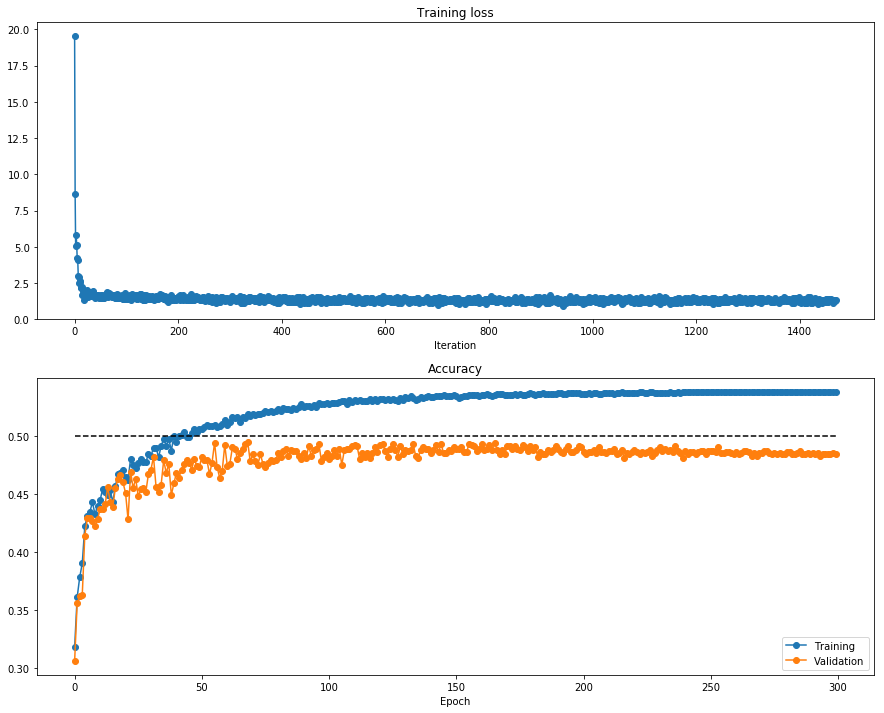

In [41]:
# Plot the learning curves
plt.subplot(2, 1, 1)
plt.title('Training loss')
loss_hist_ = loss_hist[1::100] # sparse the curve a bit
plt.plot(loss_hist_, '-o')
plt.xlabel('Iteration')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.plot(train_acc_hist, '-o', label='Training')
plt.plot(val_acc_hist, '-o', label='Validation')
plt.plot([0.5] * len(val_acc_hist), 'k--')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()

## Different Optimizers
There are several more advanced optimizers than vanilla SGD, you will implement three more sophisticated and widely-used methods in this section.  
Please complete the TODOs in the `lib/optim.py`.

## SGD + Momentum
The update rule of SGD plus momentum is as shown below:  
\begin{equation}
v_t: last\ update\ of\ the\ velocity \\
\gamma: momentum \\
\eta: learning\ rate \\
v_t = \gamma v_{t-1} - \eta \nabla_{\theta}J(\theta) \\
\theta = \theta + v_t
\end{equation}
Complete the `SGDM()` function in `lib/optim.py`.

In [42]:
# Test the implementation of SGD with Momentum
N, D = 4, 5
test_sgd = sequential(fc(N, D, name="sgd_fc"))

w = np.linspace(-0.4, 0.6, num=N*D).reshape(N, D)
dw = np.linspace(-0.6, 0.4, num=N*D).reshape(N, D)
v = np.linspace(0.6, 0.9, num=N*D).reshape(N, D)

test_sgd.layers[0].params = {"sgd_fc_w": w}
test_sgd.layers[0].grads = {"sgd_fc_w": dw}

test_sgd_momentum = SGDM(test_sgd, 1e-3, 0.9)
test_sgd_momentum.velocity = {"sgd_fc_w": v}
test_sgd_momentum.step()

updated_w = test_sgd.layers[0].params["sgd_fc_w"]
velocity = test_sgd_momentum.velocity["sgd_fc_w"]

expected_updated_w = np.asarray([
  [ 0.1406,      0.20738947,  0.27417895,  0.34096842,  0.40775789],
  [ 0.47454737,  0.54133684,  0.60812632,  0.67491579,  0.74170526],
  [ 0.80849474,  0.87528421,  0.94207368,  1.00886316,  1.07565263],
  [ 1.14244211,  1.20923158,  1.27602105,  1.34281053,  1.4096    ]])
expected_velocity = np.asarray([
  [ 0.5406,      0.55475789,  0.56891579, 0.58307368,  0.59723158],
  [ 0.61138947,  0.62554737,  0.63970526,  0.65386316,  0.66802105],
  [ 0.68217895,  0.69633684,  0.71049474,  0.72465263,  0.73881053],
  [ 0.75296842,  0.76712632,  0.78128421,  0.79544211,  0.8096    ]])

print ('The following errors should be around or less than 1e-8')
print ('updated_w error: ', rel_error(updated_w, expected_updated_w))
print ('velocity error: ', rel_error(expected_velocity, velocity))

The following errors should be around or less than 1e-8
updated_w error:  8.882347033505819e-09
velocity error:  4.269287743278663e-09


Run the following code block to train a multi-layer fully connected network with both SGD and SGD plus Momentum. The network trained with SGDM optimizer should converge faster.

Training with Vanilla SGD...
(Iteration 1 / 200) loss: 2.6852979158973356
(Epoch 1 / 5) Training Accuracy: 0.28, Validation Accuracy: 0.24
(Epoch 2 / 5) Training Accuracy: 0.334, Validation Accuracy: 0.274
(Iteration 101 / 200) loss: 1.867552659798707
(Epoch 3 / 5) Training Accuracy: 0.341, Validation Accuracy: 0.293
(Epoch 4 / 5) Training Accuracy: 0.3805, Validation Accuracy: 0.295
(Epoch 5 / 5) Training Accuracy: 0.4065, Validation Accuracy: 0.323

Training with SGD plus Momentum...
(Iteration 1 / 200) loss: 2.380825478338948
(Epoch 1 / 5) Training Accuracy: 0.31675, Validation Accuracy: 0.288
(Epoch 2 / 5) Training Accuracy: 0.40725, Validation Accuracy: 0.335
(Iteration 101 / 200) loss: 1.7151125673192922
(Epoch 3 / 5) Training Accuracy: 0.43225, Validation Accuracy: 0.344
(Epoch 4 / 5) Training Accuracy: 0.49225, Validation Accuracy: 0.346
(Epoch 5 / 5) Training Accuracy: 0.54225, Validation Accuracy: 0.345


/Users/prasanna/pradeep/virtualenvs/csci599dl/assignment1/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


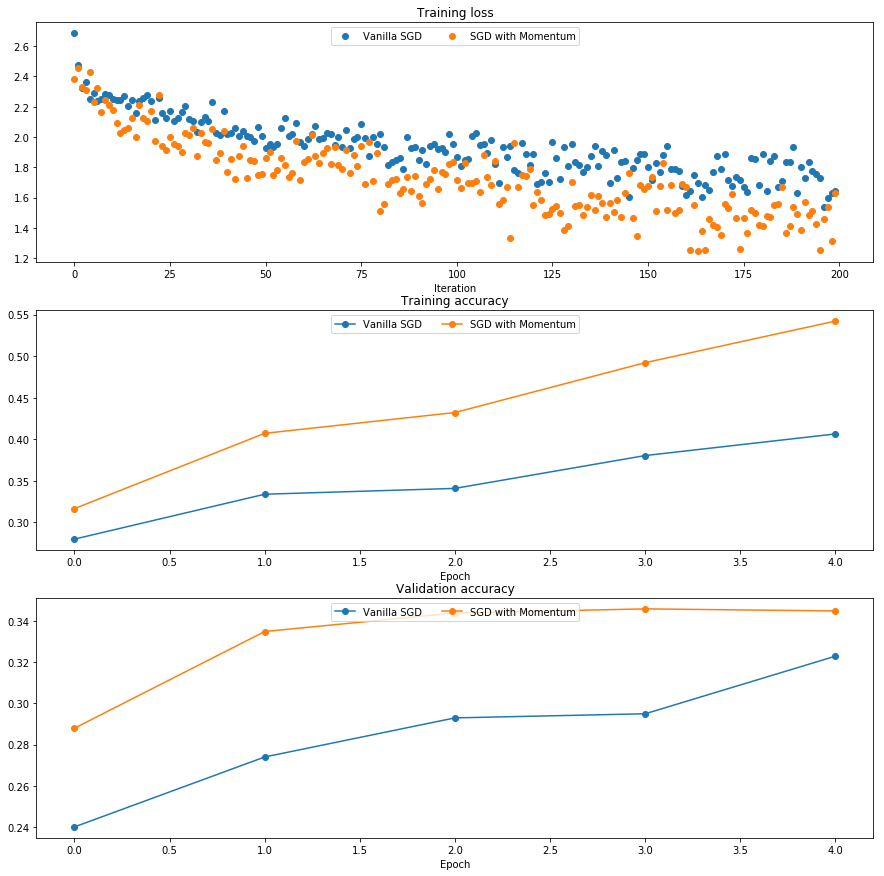

In [43]:
# Arrange a small data
num_train = 4000
small_data_dict = {
    "data_train": (data["data_train"][:num_train], data["labels_train"][:num_train]),
    "data_val": (data["data_val"], data["labels_val"]),
    "data_test": (data["data_test"], data["labels_test"])
}

model_sgd      = FullyConnectedNetwork()
model_sgdm     = FullyConnectedNetwork()
loss_f_sgd     = cross_entropy()
loss_f_sgdm    = cross_entropy()
optimizer_sgd  = SGD(model_sgd.net, 1e-2)
optimizer_sgdm = SGDM(model_sgdm.net, 1e-2, 0.9)

print ("Training with Vanilla SGD...")
results_sgd = train_net(small_data_dict, model_sgd, loss_f_sgd, optimizer_sgd, batch_size=100, 
                        max_epochs=5, show_every=100, verbose=True)

print ("\nTraining with SGD plus Momentum...")
results_sgdm = train_net(small_data_dict, model_sgdm, loss_f_sgdm, optimizer_sgdm, batch_size=100, 
                         max_epochs=5, show_every=100, verbose=True)

opt_params_sgd,  loss_hist_sgd,  train_acc_hist_sgd,  val_acc_hist_sgd  = results_sgd
opt_params_sgdm, loss_hist_sgdm, train_acc_hist_sgdm, val_acc_hist_sgdm = results_sgdm

plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Iteration')

plt.subplot(3, 1, 2)
plt.title('Training accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 3)
plt.title('Validation accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 1)
plt.plot(loss_hist_sgd, 'o', label="Vanilla SGD")
plt.subplot(3, 1, 2)
plt.plot(train_acc_hist_sgd, '-o', label="Vanilla SGD")
plt.subplot(3, 1, 3)
plt.plot(val_acc_hist_sgd, '-o', label="Vanilla SGD")
         
plt.subplot(3, 1, 1)
plt.plot(loss_hist_sgdm, 'o', label="SGD with Momentum")
plt.subplot(3, 1, 2)
plt.plot(train_acc_hist_sgdm, '-o', label="SGD with Momentum")
plt.subplot(3, 1, 3)
plt.plot(val_acc_hist_sgdm, '-o', label="SGD with Momentum")
  
for i in [1, 2, 3]:
  plt.subplot(3, 1, i)
  plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(15, 15)
plt.show()

## RMSProp
The update rule of RMSProp is as shown below:  
\begin{equation}
\gamma: decay\ rate \\
\epsilon: small\ number \\
g_t^2: squared\ gradients \\
\eta: learning\ rate \\
E[g^2]_t: decaying\ average\ of\ past\ squared\ gradients\ at\ update\ step\ t \\
E[g^2]_t = \gamma E[g^2]_{t-1} + (1-\gamma)g_t^2 \\
\theta_{t+1} = \theta_t - \frac{\eta \nabla_{\theta}J(\theta)}{\sqrt{E[g^2]_t+\epsilon}}
\end{equation}
Complete the RMSProp() function in optim.py

In [44]:
%reload_ext autoreload

# Test RMSProp implementation; you should see errors less than 1e-7
N, D = 4, 5
test_rms = sequential(fc(N, D, name="rms_fc"))

w = np.linspace(-0.4, 0.6, num=N*D).reshape(N, D)
dw = np.linspace(-0.6, 0.4, num=N*D).reshape(N, D)
cache = np.linspace(0.6, 0.9, num=N*D).reshape(N, D)

test_rms.layers[0].params = {"rms_fc_w": w}
test_rms.layers[0].grads = {"rms_fc_w": dw}

opt_rms = RMSProp(test_rms, 1e-2, 0.99)
opt_rms.cache = {"rms_fc_w": cache}
opt_rms.step()

updated_w = test_rms.layers[0].params["rms_fc_w"]
cache = opt_rms.cache["rms_fc_w"]

expected_updated_w = np.asarray([
  [-0.39223849, -0.34037513, -0.28849239, -0.23659121, -0.18467247],
  [-0.132737,   -0.08078555, -0.02881884,  0.02316247,  0.07515774],
  [ 0.12716641,  0.17918792,  0.23122175,  0.28326742,  0.33532447],
  [ 0.38739248,  0.43947102,  0.49155973,  0.54365823,  0.59576619]])
expected_cache = np.asarray([
  [ 0.5976,      0.6126277,   0.6277108,   0.64284931,  0.65804321],
  [ 0.67329252,  0.68859723,  0.70395734,  0.71937285,  0.73484377],
  [ 0.75037008,  0.7659518,   0.78158892,  0.79728144,  0.81302936],
  [ 0.82883269,  0.84469141,  0.86060554,  0.87657507,  0.8926    ]])

print ('The following errors should be around or less than 1e-7')
print ('updated_w error: ', rel_error(expected_updated_w, updated_w))
print ('cache error: ', rel_error(expected_cache, opt_rms.cache["rms_fc_w"]))

The following errors should be around or less than 1e-7
updated_w error:  9.502645229894295e-08
cache error:  2.6477955807156126e-09


## Adam
The update rule of Adam is as shown below:  
\begin{equation}
t = t + 1 \\
g_t: gradients\ at\ update\ step\ t \\
m_t = \beta_1m_{t-1} + (1-\beta_1)g_t \\
v_t = \beta_2v_{t-1} + (1-\beta_2)g_t^2 \\
\hat{m_t} = m_t / (1 - \beta_1^t) \\
\hat{v_t} = v_t / (1 - \beta_2^t) \\
\theta_{t+1} = \theta_t - \frac{\eta\ \hat{m_t}}{\sqrt{\hat{v_t}}+\epsilon} \\
\end{equation}
Complete the Adam() function in optim.py

In [45]:
%reload_ext autoreload

# Test Adam implementation; you should see errors around 1e-7 or less
N, D = 4, 5
test_adam = sequential(fc(N, D, name="adam_fc"))

w = np.linspace(-0.4, 0.6, num=N*D).reshape(N, D)
dw = np.linspace(-0.6, 0.4, num=N*D).reshape(N, D)
m = np.linspace(0.6, 0.9, num=N*D).reshape(N, D)
v = np.linspace(0.7, 0.5, num=N*D).reshape(N, D)

test_adam.layers[0].params = {"adam_fc_w": w}
test_adam.layers[0].grads = {"adam_fc_w": dw}

opt_adam = Adam(test_adam, 1e-2, 0.9, 0.999, t=5)
opt_adam.mt = {"adam_fc_w": m}
opt_adam.vt = {"adam_fc_w": v}
opt_adam.step()

updated_w = test_adam.layers[0].params["adam_fc_w"]
mt = opt_adam.mt["adam_fc_w"]
vt = opt_adam.vt["adam_fc_w"]

expected_updated_w = np.asarray([
  [-0.40094747, -0.34836187, -0.29577703, -0.24319299, -0.19060977],
  [-0.1380274,  -0.08544591, -0.03286534,  0.01971428,  0.0722929],
  [ 0.1248705,   0.17744702,  0.23002243,  0.28259667,  0.33516969],
  [ 0.38774145,  0.44031188,  0.49288093,  0.54544852,  0.59801459]])
expected_v = np.asarray([
  [ 0.69966,     0.68908382,  0.67851319,  0.66794809,  0.65738853,],
  [ 0.64683452,  0.63628604,  0.6257431,   0.61520571,  0.60467385,],
  [ 0.59414753,  0.58362676,  0.57311152,  0.56260183,  0.55209767,],
  [ 0.54159906,  0.53110598,  0.52061845,  0.51013645,  0.49966,   ]])
expected_m = np.asarray([
  [ 0.48,        0.49947368,  0.51894737,  0.53842105,  0.55789474],
  [ 0.57736842,  0.59684211,  0.61631579,  0.63578947,  0.65526316],
  [ 0.67473684,  0.69421053,  0.71368421,  0.73315789,  0.75263158],
  [ 0.77210526,  0.79157895,  0.81105263,  0.83052632,  0.85      ]])

print ('The following errors should be around or less than 1e-7')
print ('updated_w error: ', rel_error(expected_updated_w, updated_w))
print ('mt error: ', rel_error(expected_m, mt))
print ('vt error: ', rel_error(expected_v, vt))

The following errors should be around or less than 1e-7
updated_w error:  1.1395691798535431e-07
mt error:  4.214963193114416e-09
vt error:  4.208314038113071e-09


## Comparing the optimizers
Run the following code block to compare the plotted results among all the above optimizers. You should see SGD with Momentum, RMSProp, and Adam optimizers work better than Vanilla SGD optimizer.

Training with RMSProp...
(Iteration 1 / 200) loss: 2.4973084480998953
(Epoch 1 / 5) Training Accuracy: 0.34375, Validation Accuracy: 0.285
(Epoch 2 / 5) Training Accuracy: 0.4245, Validation Accuracy: 0.347
(Iteration 101 / 200) loss: 1.597730759278165
(Epoch 3 / 5) Training Accuracy: 0.482, Validation Accuracy: 0.371
(Epoch 4 / 5) Training Accuracy: 0.5425, Validation Accuracy: 0.354
(Epoch 5 / 5) Training Accuracy: 0.58075, Validation Accuracy: 0.371

Training with Adam...
(Iteration 1 / 200) loss: 2.4913357066649873
(Epoch 1 / 5) Training Accuracy: 0.38775, Validation Accuracy: 0.325
(Epoch 2 / 5) Training Accuracy: 0.45275, Validation Accuracy: 0.33
(Iteration 101 / 200) loss: 1.5773754244765508
(Epoch 3 / 5) Training Accuracy: 0.53125, Validation Accuracy: 0.371
(Epoch 4 / 5) Training Accuracy: 0.578, Validation Accuracy: 0.354
(Epoch 5 / 5) Training Accuracy: 0.6245, Validation Accuracy: 0.368


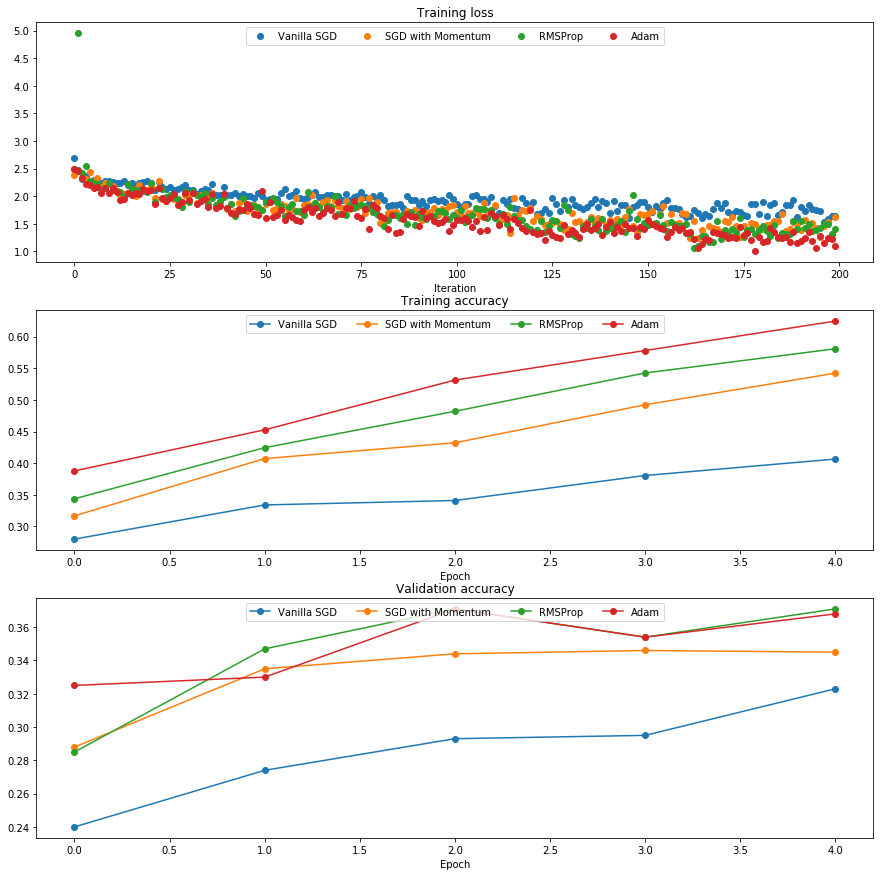

In [46]:
model_rms      = FullyConnectedNetwork()
model_adam     = FullyConnectedNetwork()
loss_f_rms     = cross_entropy()
loss_f_adam    = cross_entropy()
optimizer_rms  = RMSProp(model_rms.net, 5e-4)
optimizer_adam = Adam(model_adam.net, 5e-4)

print ("Training with RMSProp...")
results_rms = train_net(small_data_dict, model_rms, loss_f_rms, optimizer_rms, batch_size=100, 
                        max_epochs=5, show_every=100, verbose=True)

print ("\nTraining with Adam...")
results_adam = train_net(small_data_dict, model_adam, loss_f_adam, optimizer_adam, batch_size=100, 
                         max_epochs=5, show_every=100, verbose=True)

opt_params_rms,  loss_hist_rms,  train_acc_hist_rms,  val_acc_hist_rms  = results_rms
opt_params_adam, loss_hist_adam, train_acc_hist_adam, val_acc_hist_adam = results_adam

plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Iteration')

plt.subplot(3, 1, 2)
plt.title('Training accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 3)
plt.title('Validation accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 1)
plt.plot(loss_hist_sgd, 'o', label="Vanilla SGD")
plt.subplot(3, 1, 2)
plt.plot(train_acc_hist_sgd, '-o', label="Vanilla SGD")
plt.subplot(3, 1, 3)
plt.plot(val_acc_hist_sgd, '-o', label="Vanilla SGD")
         
plt.subplot(3, 1, 1)
plt.plot(loss_hist_sgdm, 'o', label="SGD with Momentum")
plt.subplot(3, 1, 2)
plt.plot(train_acc_hist_sgdm, '-o', label="SGD with Momentum")
plt.subplot(3, 1, 3)
plt.plot(val_acc_hist_sgdm, '-o', label="SGD with Momentum")

plt.subplot(3, 1, 1)
plt.plot(loss_hist_rms, 'o', label="RMSProp")
plt.subplot(3, 1, 2)
plt.plot(train_acc_hist_rms, '-o', label="RMSProp")
plt.subplot(3, 1, 3)
plt.plot(val_acc_hist_rms, '-o', label="RMSProp")
         
plt.subplot(3, 1, 1)
plt.plot(loss_hist_adam, 'o', label="Adam")
plt.subplot(3, 1, 2)
plt.plot(train_acc_hist_adam, '-o', label="Adam")
plt.subplot(3, 1, 3)
plt.plot(val_acc_hist_adam, '-o', label="Adam")
  
for i in [1, 2, 3]:
  plt.subplot(3, 1, i)
  plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(15, 15)
plt.show()

## Training a Network with Dropout
Run the following code blocks to compare the results with and without dropout

In [47]:
# Train two identical nets, one with dropout and one without
num_train = 200
data_dict_500 = {
    "data_train": (data["data_train"][:num_train], data["labels_train"][:num_train]),
    "data_val": (data["data_val"], data["labels_val"]),
    "data_test": (data["data_test"], data["labels_test"])
}

solvers = {}
keep_ps = [0, 0.25, 0.50, 0.75]

results_dict = {}
for keep_prob in keep_ps:
    results_dict[keep_prob] = {}

for keep_prob in keep_ps:
    print ("Dropout Keep Prob =", keep_prob)
    model = DropoutNetTest(keep_prob=keep_prob)
    loss_f = cross_entropy()
    optimizer = SGD(model.net, 1e-4)
    results = train_net(data_dict_500, model, loss_f, optimizer, batch_size=100, 
                        max_epochs=25, show_every=100, verbose=True)
    opt_params, loss_hist, train_acc_hist, val_acc_hist = results
    results_dict[keep_prob] = {
        "opt_params": opt_params, 
        "loss_hist": loss_hist, 
        "train_acc_hist": train_acc_hist, 
        "val_acc_hist": val_acc_hist
    }

Dropout Keep Prob = 0
(Iteration 1 / 50) loss: 2.7114558019660073
(Epoch 1 / 25) Training Accuracy: 0.05, Validation Accuracy: 0.084
(Epoch 2 / 25) Training Accuracy: 0.055, Validation Accuracy: 0.087
(Epoch 3 / 25) Training Accuracy: 0.05, Validation Accuracy: 0.081
(Epoch 4 / 25) Training Accuracy: 0.05, Validation Accuracy: 0.087
(Epoch 5 / 25) Training Accuracy: 0.065, Validation Accuracy: 0.089
(Epoch 6 / 25) Training Accuracy: 0.07, Validation Accuracy: 0.095
(Epoch 7 / 25) Training Accuracy: 0.085, Validation Accuracy: 0.106
(Epoch 8 / 25) Training Accuracy: 0.095, Validation Accuracy: 0.113
(Epoch 9 / 25) Training Accuracy: 0.13, Validation Accuracy: 0.117
(Epoch 10 / 25) Training Accuracy: 0.135, Validation Accuracy: 0.12
(Epoch 11 / 25) Training Accuracy: 0.15, Validation Accuracy: 0.124
(Epoch 12 / 25) Training Accuracy: 0.15, Validation Accuracy: 0.122
(Epoch 13 / 25) Training Accuracy: 0.155, Validation Accuracy: 0.129
(Epoch 14 / 25) Training Accuracy: 0.16, Validation Ac

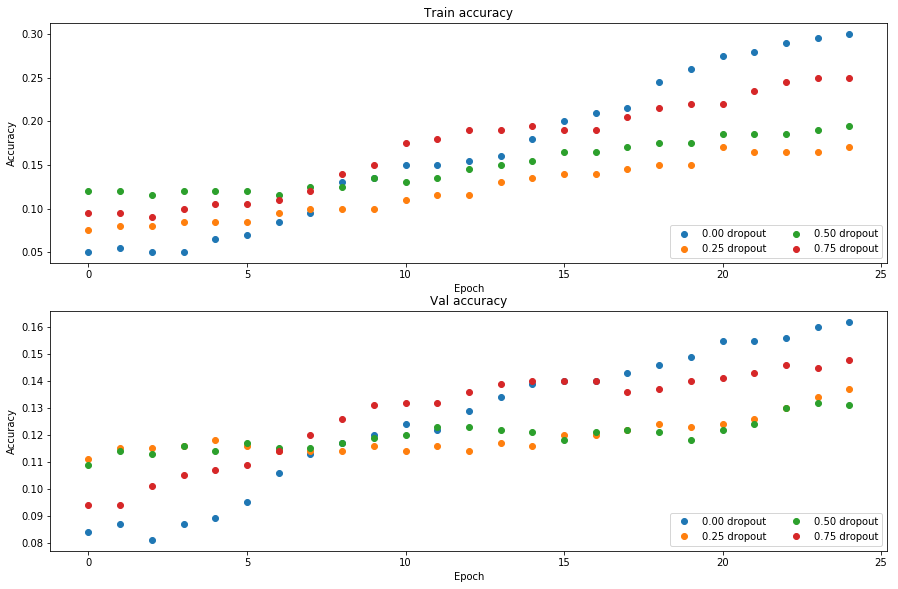

In [48]:
# Plot train and validation accuracies of the two models
train_accs = []
val_accs = []
for keep_prob in keep_ps:
    curr_dict = results_dict[keep_prob]
    train_accs.append(curr_dict["train_acc_hist"][-1])
    val_accs.append(curr_dict["val_acc_hist"][-1])

plt.subplot(3, 1, 1)
for keep_prob in keep_ps:
    curr_dict = results_dict[keep_prob]
    plt.plot(curr_dict["train_acc_hist"], 'o', label='%.2f dropout' % keep_prob)
plt.title('Train accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(ncol=2, loc='lower right')
  
plt.subplot(3, 1, 2)
for keep_prob in keep_ps:
    curr_dict = results_dict[keep_prob]
    plt.plot(curr_dict["val_acc_hist"], 'o', label='%.2f dropout' % keep_prob)
plt.title('Val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(ncol=2, loc='lower right')

plt.gcf().set_size_inches(15, 15)
plt.show()

### Inline Question: Describe what you observe from the above results and graphs
#### Ans:
Without the dropout, there's a huge gap between training accuracy and validation accuracy (validation about 50% of training accuracy) indicating an overfitting to the training data and not generalizing well for new data. With dropout, though the overall accuracy is lesser, the training accuracy and test accuracy are more similar (validation about 75% of training accuracy). So it may take longer time to train with dropout to achieve a reasonable training accuracy however the model would be more performant with new data.

## Plot the Activation Functions
In each of the activation function, use the given lambda function template to plot their corresponding curves.

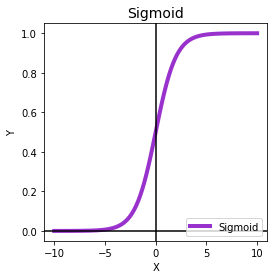

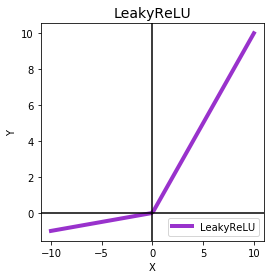

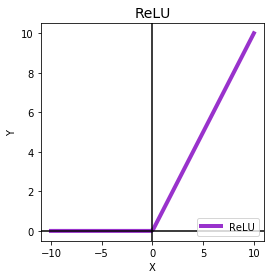

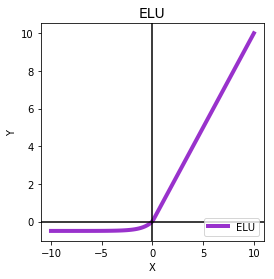

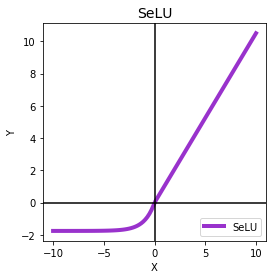

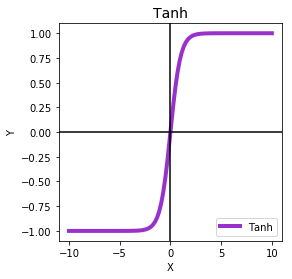

In [49]:
left, right = -10, 10
X  = np.linspace(left, right, 100)
XS = np.linspace(-5, 5, 10)
lw = 4
alpha = 0.1 # alpha for leaky_relu
elu_alpha = 0.5
selu_alpha = 1.6732
selu_scale = 1.0507

#########################
####### YOUR CODE #######
#########################
elu_helper = np.frompyfunc(lambda x, alpha: x if x >= 0 else alpha * (np.exp(x)-1), 2, 1)
sigmoid = lambda x: 1/(1+np.exp(-x))
leaky_relu = lambda x: np.maximum(x, alpha*x)
relu = lambda x: np.maximum(x, 0)
elu = lambda x: elu_helper(x, elu_alpha).astype(dtype = x.dtype)
selu = lambda x: selu_scale * elu_helper(x, selu_alpha).astype(dtype = x.dtype)
tanh = lambda x: np.tanh(x)
#########################
### END OF YOUR CODE ####
#########################

activations = {
    "Sigmoid": sigmoid,
    "LeakyReLU": leaky_relu,
    "ReLU": relu,
    "ELU": elu,
    "SeLU": selu,
    "Tanh": tanh
}

# Ground Truth activations
GT_Act = {
    "Sigmoid": [0.00669285092428, 0.0200575365379, 0.0585369028744, 0.158869104881, 0.364576440742, 
                0.635423559258, 0.841130895119, 0.941463097126, 0.979942463462, 0.993307149076],
    "LeakyReLU": [-0.5, -0.388888888889, -0.277777777778, -0.166666666667, -0.0555555555556, 
                  0.555555555556, 1.66666666667, 2.77777777778, 3.88888888889, 5.0],
    "ReLU": [-0.0, -0.0, -0.0, -0.0, -0.0, 0.555555555556, 1.66666666667, 2.77777777778, 3.88888888889, 5.0],
    "ELU": [-0.4966310265, -0.489765962143, -0.468911737989, -0.405562198581, -0.213123289631, 
            0.555555555556, 1.66666666667, 2.77777777778, 3.88888888889, 5.0],
    "SeLU": [-1.74618571868, -1.72204772347, -1.64872296837, -1.42598202974, -0.749354802287, 
             0.583722222222, 1.75116666667, 2.91861111111, 4.08605555556, 5.2535],
    "Tanh": [-0.999909204263, -0.999162466631, -0.992297935288, -0.931109608668, -0.504672397722, 
             0.504672397722, 0.931109608668, 0.992297935288, 0.999162466631, 0.999909204263]
} 

for label in activations:
    fig = plt.figure(figsize=(4,4))
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(X, activations[label](X), color='darkorchid', lw=lw, label=label)
    assert rel_error(activations[label](XS), GT_Act[label]) < 1e-9, \
           "Your implementation of {} might be wrong".format(label)
    ax.legend(loc="lower right")
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_title('{}'.format(label), fontsize=14)
    plt.xlabel(r"X")
    plt.ylabel(r"Y")
    plt.show()